## Student Habits vs Academics Performance Model Training

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Load Cleaned and Preprocessed Dataset

In [3]:
df = pd.read_csv('data/cleaned_stud_habits_performance.csv')
df.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,gender_Male,gender_Other
0,23,0.0,1.2,1.1,0,85.0,8.0,0.0,6,2.0,0.0,8,1,56.2,0.0,0.0
1,20,6.9,2.8,2.3,0,97.3,4.6,1.0,6,1.0,0.0,8,0,100.0,0.0,0.0
2,21,1.4,3.1,1.3,0,94.8,8.0,2.0,1,1.0,2.0,1,0,34.3,1.0,0.0
3,23,1.0,3.9,1.0,0,71.0,9.2,2.0,4,2.0,1.0,1,1,26.8,0.0,0.0
4,19,5.0,4.4,0.5,0,90.9,4.9,0.0,3,2.0,1.0,1,0,66.4,0.0,0.0


#### Data Splitting into Dependent and Independent Features

In [4]:
# Independent Features
X = df.drop(columns=['exam_score'], axis=1)

# Dependent Features 
y = df['exam_score']

In [5]:
X

,age,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,gender_Male,gender_Other
0,23,0.0,1.2,1.1,0,85.0,8.0,0.0,6,2.0,0.0,8,1,0.0,0.0
1,20,6.9,2.8,2.3,0,97.3,4.6,1.0,6,1.0,0.0,8,0,0.0,0.0
2,21,1.4,3.1,1.3,0,94.8,8.0,2.0,1,1.0,2.0,1,0,1.0,0.0
3,23,1.0,3.9,1.0,0,71.0,9.2,2.0,4,2.0,1.0,1,1,0.0,0.0
4,19,5.0,4.4,0.5,0,90.9,4.9,0.0,3,2.0,1.0,1,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,2.6,0.5,1.6,0,77.0,7.5,0.0,2,1.0,1.0,6,1,0.0,0.0
996,17,2.9,1.0,2.4,1,86.0,6.8,2.0,1,1.0,0.0,6,1,0.0,0.0
997,20,3.0,2.6,1.3,0,61.9,6.5,1.0,5,0.0,1.0,9,1,1.0,0.0
998,24,5.4,4.1,1.1,1,100.0,7.6,0.0,0,0.0,0.0,1,0,1.0,0.0


In [6]:
y

0       56.2
1      100.0
2       34.3
3       26.8
4       66.4
       ...  
995     76.1
996     65.9
997     64.4
998     69.7
999     74.9
Name: exam_score, Length: 1000, dtype: float64

#### Splitting Data into Training and Testing 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 15), (200, 15), (800,), (200,))

#### Feature Scaling

In [8]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)     # Scaling the training data
X_test = scaler.transform(X_test)           # Scaling the test data  

In [9]:
X_train

array([[-0.210232  , -1.04978529,  0.6126009 , ...,  1.44940512,
        -0.93933644, -0.21389632],
       [ 0.65894423,  1.91518641,  1.46938539, ..., -0.68993823,
        -0.93933644, -0.21389632],
       [-0.210232  , -0.71285669, -0.50121892, ..., -0.68993823,
        -0.93933644, -0.21389632],
       ...,
       [-0.210232  ,  0.02838623,  1.21235004, ...,  1.44940512,
        -0.93933644, -0.21389632],
       [ 1.52812047, -1.04978529, -2.12910944, ...,  1.44940512,
         1.06458129, -0.21389632],
       [-1.07940824,  0.50008628,  1.29802849, ..., -0.68993823,
         1.06458129, -0.21389632]], shape=(800, 15))

In [10]:
X_test

array([[ 1.09353235, -0.03899949, -0.32986203, ..., -0.68993823,
         1.06458129, -0.21389632],
       [ 0.22435612,  1.5782578 ,  1.81209918, ...,  1.44940512,
         1.06458129, -0.21389632],
       [ 1.09353235,  0.63485772, -0.07282668, ...,  1.44940512,
        -0.93933644, -0.21389632],
       ...,
       [ 0.65894423, -0.51069953, -1.10096806, ..., -0.68993823,
         1.06458129, -0.21389632],
       [-1.07940824,  0.16315768, -1.61503875, ..., -0.68993823,
        -0.93933644, -0.21389632],
       [ 1.09353235,  0.567472  , -0.41554047, ..., -0.68993823,
        -0.93933644, -0.21389632]], shape=(200, 15))

### (6.) Model Training

#### Create an Evaluate Function to give all Metrics After Model Training

In [11]:
def evaluate_model(y_pred, y_test):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return mse, mae, r2, rmse

In [ ]:
models = {
    'Linear Regression':LinearRegression(),
    'Ridge Regression':Ridge(),
    'Lasso Regression':Lasso(),
    'ElasticNet Regression':ElasticNet(),
    'Support Vector Regression':SVR(),
    'Decision Tree Regressor':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'Gradient Boosting Regressor':GradientBoostingRegressor(),
    'AdaBoost Regressor':AdaBoostRegressor(),
    'K-Neighbors Regressor':KNeighborsRegressor(),
    'XGBoost Regressor':XGBRegressor(),
    'CatBoost Regressor':CatBoostRegressor(),
    'LightGBM Regressor':LGBMRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mse, model_train_mae, model_train_r2, model_train_rmse = evaluate_model(y_train, y_train_pred)

    model_test_mse , model_test_mae, model_test_r2, model_test_rmse = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Mean Squared Error: 28.6752
- Root Mean Squared Error: 5.3549
- Mean Absolute Error: 4.2145
- R2 Score: 0.8910
----------------------------------
Model performance for Test set
- Mean Squared Error: 26.4219
- Root Mean Squared Error: 5.1402
- Mean Absolute Error: 4.1728
- R2 Score: 0.8803


Ridge Regression
Model performance for Training set
- Mean Squared Error: 28.6756
- Root Mean Squared Error: 5.3550
- Mean Absolute Error: 4.2149
- R2 Score: 0.8908
----------------------------------
Model performance for Test set
- Mean Squared Error: 26.4364
- Root Mean Squared Error: 5.1416
- Mean Absolute Error: 4.1740
- R2 Score: 0.8799


Lasso Regression
Model performance for Training set
- Mean Squared Error: 35.7342
- Root Mean Squared Error: 5.9778
- Mean Absolute Error: 4.7610
- R2 Score: 0.8266
----------------------------------
Model performance for Test set
- Mean Squared Error: 33.2737
- Root Mean Squared Error: 5.7683
- Mean Absol

e:\Projects\Student Habits vs Academics Performance\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
e:\Projects\Student Habits vs Academics Performance\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


#### Results

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model', 'R2 Score']).sort_values(by='R2 Score', ascending=False)

,Model,R2 Score
11,CatBoost Regressor,0.880585
0,Linear Regression,0.880277
1,Ridge Regression,0.879910
7,Gradient Boosting Regressor,0.864349
12,LightGBM Regressor,0.856115
10,XGBoost Regressor,0.832639
6,Random Forest Regressor,0.818766
2,Lasso Regression,0.809930
8,AdaBoost Regressor,0.729662
5,Decision Tree Regressor,0.659142


### (7.) Model Selection and Evaluation

#### CatBoost Regressor

In [16]:
catboost_model = CatBoostRegressor()
catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
mse, mae, r2, rmse = evaluate_model(y_pred, y_test)
print("CatBoostRegressor Performance:")
print("-Mean Squared Error: {:.4f}".format(mse))
print("-Mean Absolute Error: {:.4f}".format(mae))
print("-R2 Score: {:.4f}".format(r2))
print("-Root Mean Squared Error: {:.4f}".format(rmse))

Learning rate set to 0.039525
0:	learn: 16.6785556	total: 2.29ms	remaining: 2.28s
1:	learn: 16.2777047	total: 3.9ms	remaining: 1.95s
2:	learn: 15.9254023	total: 5.88ms	remaining: 1.96s
3:	learn: 15.5777367	total: 7.51ms	remaining: 1.87s
4:	learn: 15.2144997	total: 9.96ms	remaining: 1.98s
5:	learn: 14.8677926	total: 11.7ms	remaining: 1.94s
6:	learn: 14.5693909	total: 13.9ms	remaining: 1.98s
7:	learn: 14.2281064	total: 15.7ms	remaining: 1.94s
8:	learn: 13.9125903	total: 17.4ms	remaining: 1.92s
9:	learn: 13.6171213	total: 18.8ms	remaining: 1.86s
10:	learn: 13.3796242	total: 19.8ms	remaining: 1.78s
11:	learn: 13.1562998	total: 21.2ms	remaining: 1.75s
12:	learn: 12.8873764	total: 22.7ms	remaining: 1.73s
13:	learn: 12.6093204	total: 25.1ms	remaining: 1.77s
14:	learn: 12.3777262	total: 26.8ms	remaining: 1.76s
15:	learn: 12.1379898	total: 28.3ms	remaining: 1.74s
16:	learn: 11.9342240	total: 29.6ms	remaining: 1.71s
17:	learn: 11.6970085	total: 31.1ms	remaining: 1.7s
18:	learn: 11.4829653	total:

#### Plot y_test vs y_pred

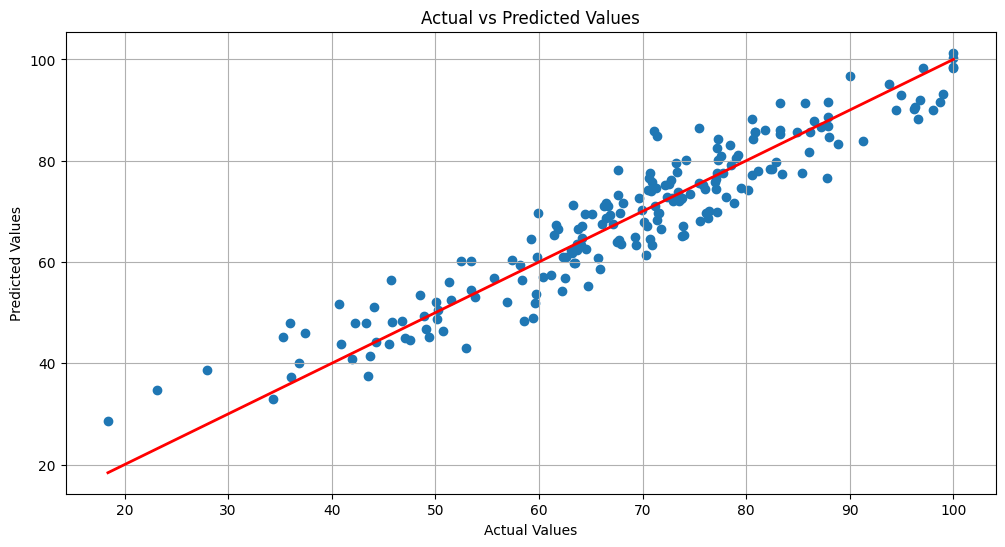

In [18]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid()

#### Difference Between Actual and Predicted Values

In [19]:
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, 'Difference':(y_test - y_pred)}).head(10)

,Actual,Predicted,Difference
521,64.2,67.041589,-2.841589
737,72.7,76.131520,-3.431520
740,79.0,80.629696,-1.629696
660,79.5,74.646687,4.853313
411,58.2,59.379748,-1.179748
678,53.4,60.213641,-6.813641
626,70.8,74.078702,-3.278702
513,62.5,56.936034,5.563966
859,36.8,40.079260,-3.279260
136,67.6,73.173991,-5.573991


C:\Users\anu52\AppData\Local\Temp\ipykernel_520\3497451162.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis', orient='h')


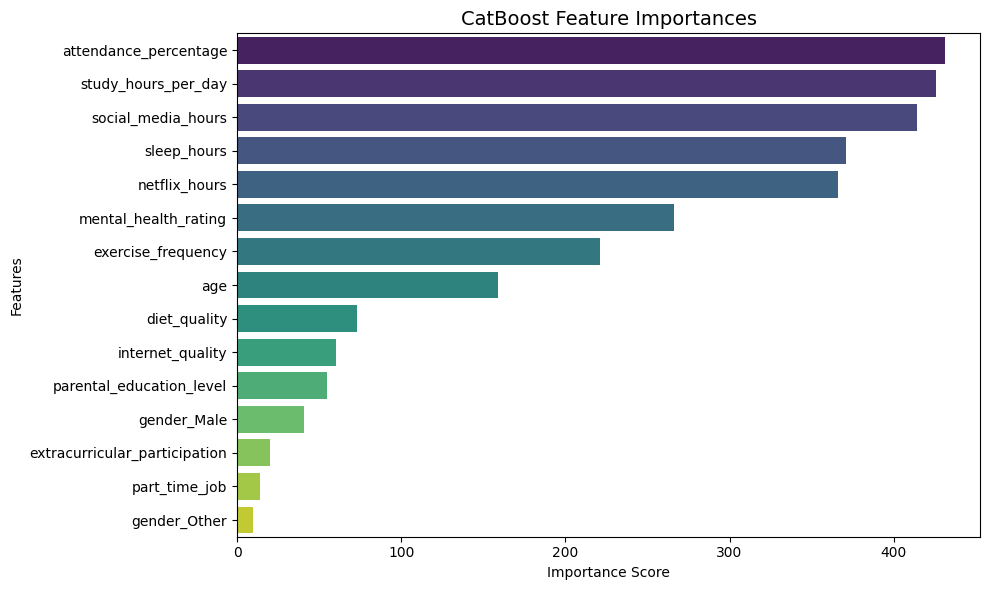

In [21]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns  # Make sure X is your feature set

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis', orient='h')
plt.title('CatBoost Feature Importances', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

#### Feature Importance – CatBoost Regressor
The feature importance scores generated by **CatBoost Regressor** represent the relative contribution of each feature to the model’s predictions. These values are not scaled between 0 and 1 or expressed in percentages by default.

- The importance score is calculated based on how often a feature is used to split the data across all trees, and how much those splits improve the model's performance (i.e., reduce loss).

- These scores can have high numerical values (e.g., 400+), which does not indicate error or scale issues, but rather show relative importance.

- A higher score simply means that the feature has a stronger impact on the final prediction compared to others.

If needed, the scores can be **normalized** to a 0–100 scale for easier interpretation and visualization.

C:\Users\anu52\AppData\Local\Temp\ipykernel_520\1776010257.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Normalized Importance', y='Feature', palette='viridis', orient='h')


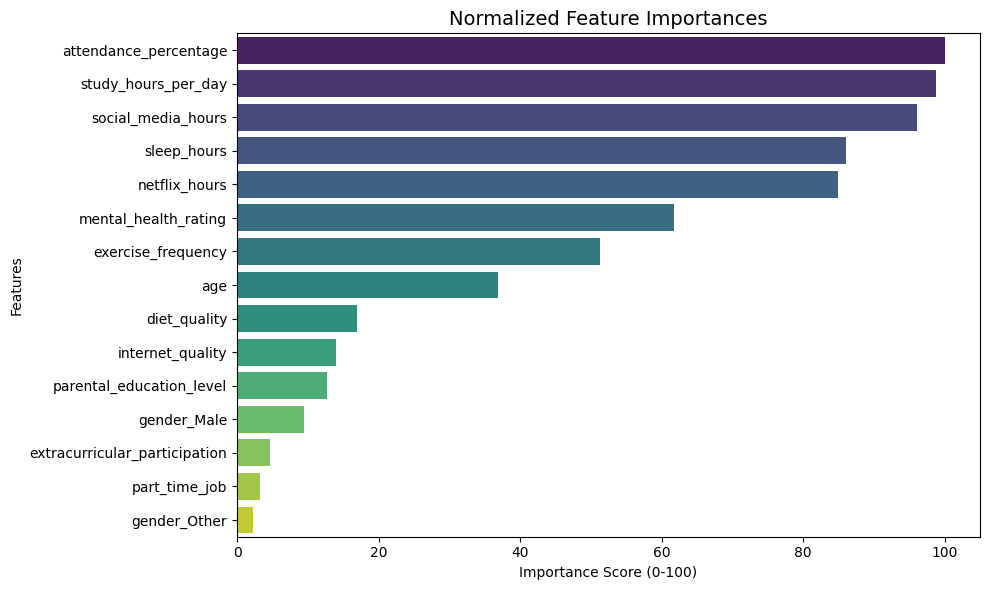

In [24]:
plt.figure(figsize=(10, 6))
# Normalize feature importances (0–100 scale)
feat_imp_df['Normalized Importance'] = 100 * (feat_imp_df['Importance'] / feat_imp_df['Importance'].max())

sns.barplot(data=feat_imp_df, x='Normalized Importance', y='Feature', palette='viridis', orient='h')
plt.title('Normalized Feature Importances', fontsize=14)
plt.xlabel('Importance Score (0-100)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [25]:
feat_imp_df

,Feature,Importance,Normalized Importance
5,attendance_percentage,431,100.000000
1,study_hours_per_day,426,98.839907
2,social_media_hours,414,96.055684
6,sleep_hours,371,86.078886
3,netflix_hours,366,84.918794
11,mental_health_rating,266,61.716937
8,exercise_frequency,221,51.276102
0,age,159,36.890951
7,diet_quality,73,16.937355
10,internet_quality,60,13.921114
